In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4618,6350-XFYGW,Male,1,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.75,422.4,No
2730,1169-SAOCL,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),106.65,5168.1,No
3560,4452-QIIEB,Male,0,No,No,7,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,43.90,278.4,No
1998,7615-ESMYF,Female,0,Yes,No,2,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,44.60,97.1,Yes
3564,7820-ZYGNY,Male,0,No,No,63,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,One year,No,Credit card (automatic),90.45,5825.5,No


In [4]:
df.drop(['customerID'], axis=1, inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [9]:
df.shape

(7043, 20)

In [10]:
df.iloc[488].TotalCharges

' '

In [11]:
df1 = df[df['TotalCharges']!= ' ' ]

In [12]:
df1.shape

(7032, 20)

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/home/krishna/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df1.TotalCharges.dtypes

dtype('float64')

In [14]:
df1.tenure.values

array([ 1, 34,  2, ..., 11,  4, 66])

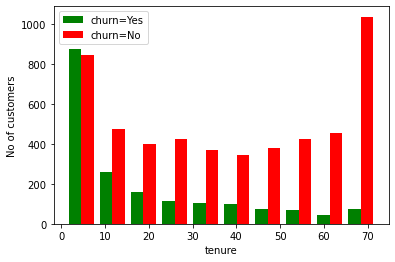

In [24]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.hist([tenure_churn_yes, tenure_churn_no] , color=['green', 'red'], label=['churn=Yes', 'churn=No'])
plt.legend()

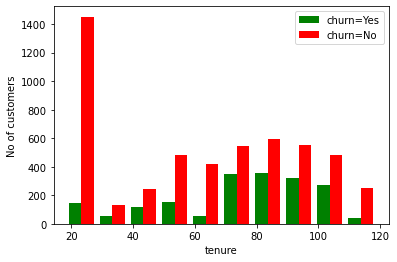

In [29]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('tenure')
plt.ylabel('No of customers')
plt.hist([tenure_churn_yes, tenure_churn_no] , color=['green', 'red'], label=['churn=Yes', 'churn=No'])
plt.legend()

In [39]:
for column in df1.columns:
    print(column ,'--> ', df1[column].unique())

gender -->  ['Female' 'Male']
SeniorCitizen -->  [0 1]
Partner -->  ['Yes' 'No']
Dependents -->  ['No' 'Yes']
tenure -->  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService -->  ['No' 'Yes']
MultipleLines -->  ['No' 'Yes']
InternetService -->  ['DSL' 'Fiber optic' 'No']
OnlineSecurity -->  ['No' 'Yes']
OnlineBackup -->  ['Yes' 'No']
DeviceProtection -->  ['No' 'Yes']
TechSupport -->  ['No' 'Yes']
StreamingTV -->  ['No' 'Yes']
StreamingMovies -->  ['No' 'Yes']
Contract -->  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -->  ['Yes' 'No']
PaymentMethod -->  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges -->  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges -->  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn -->  ['No' 'Ye

In [38]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [42]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for cols in yes_no_columns:
    df1[cols].replace({'Yes':0, 'No':1}, inplace=True)

/home/krishna/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [45]:
for col in df1:
    print(col , '---->' ,df1[col].unique())

gender ----> ['Female' 'Male']
SeniorCitizen ----> [0 1]
Partner ----> [0 1]
Dependents ----> [1 0]
tenure ----> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ----> [1 0]
MultipleLines ----> [1 0]
InternetService ----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity ----> [1 0]
OnlineBackup ----> [0 1]
DeviceProtection ----> [1 0]
TechSupport ----> [1 0]
StreamingTV ----> [1 0]
StreamingMovies ----> [1 0]
Contract ----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ----> [0 1]
PaymentMethod ----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges ----> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ----> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ----> [1 0]


In [46]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [47]:
df1.gender.unique()

array([1, 0])

In [48]:
pd.get_dummies(df1.InternetService)

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7038,1,0,0
7039,0,1,0
7040,1,0,0
7041,0,1,0


In [49]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [51]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [54]:
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,1,1,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,1,1,34,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,1,2,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,1,1,45,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,1,1,2,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [56]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [59]:
df2[cols_to_scale].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [61]:
for col in df2:
    print(f'{col} - {df2[col].unique()}')

gender - [1 0]
SeniorCitizen - [0 1]
Partner - [0 1]
Dependents - [1 0]
tenure - [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService - [1 0]
MultipleLines - [1 0]
OnlineSecurity - [1 0]
OnlineBackup - [0 1]
DeviceProtection - [1 0]
Tech

In [62]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [65]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Churn, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)



In [70]:
X_train.shape

(5625, 26)

In [72]:
X_test.shape

(1407, 26)

In [78]:
len(X_train.columns)

26

In [83]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26, ), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [84]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5932 - accuracy: 0.6764
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7850
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.7935
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8005
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.7976
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8174
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8101
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8084
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3943 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8203
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8246
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8279
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8168
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8211
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8177
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8201
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8134
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8210
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 

In [85]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.7882


[0.44883593916893005, 0.7882018685340881]

In [91]:
y_p = model.predict(X_test)

In [87]:
y_test

2660    1
744     1
5579    0
64      0
3287    0
       ..
2024    1
4396    0
4081    0
1297    1
4899    0
Name: Churn, Length: 1407, dtype: int64

In [94]:
y_preddict = []

for elem in y_p:
    if elem > 0.5:
        y_preddict.append(1)
    else:
        y_preddict.append(0)

In [97]:
y_preddict[:10]

[1, 1, 1, 0, 0, 0, 1, 0, 1, 1]

In [98]:
y_test[:10]

2660    1
744     1
5579    0
64      0
3287    0
816     0
2670    1
5920    1
1023    1
6087    1
Name: Churn, dtype: int64

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, y_preddict))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       408
           1       0.84      0.87      0.85       999

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

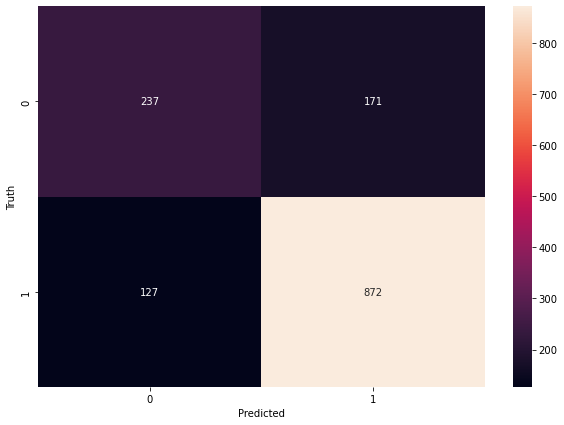

In [101]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preddict)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [103]:
accuracy = accuracy_score(y_test, y_preddict)
accuracy

0.7882018479033405